In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import plotly.express as px

# Load the data
data = pd.read_csv('final_updated_dataset_with_forecasts.csv')

# Analyze the 'TotalNetSales' column
sales = data['TotalNetSales']

# Define sales range bins
bins = range(int(sales.min()), int(sales.max()) + 1000, 1000)
labels = [f"{i} to {i+1000}" for i in bins[:-1]]

# Create a histogram of the sales ranges
data['SalesRange'] = pd.cut(sales, bins=bins, labels=labels, right=False)
sales_histogram = data['SalesRange'].value_counts().sort_index()

# Convert to DataFrame for plotting
sales_histogram_df = sales_histogram.reset_index()
sales_histogram_df.columns = ['Sales Range', 'Frequency']

# Plotting the sales distribution using Plotly
fig = px.bar(sales_histogram_df, x='Sales Range', y='Frequency',
             hover_data={'Frequency': True},
             title='Distribution of Total Net Sales',
             labels={'Frequency': 'Count of Sales', 'Sales Range': 'Range of Total Net Sales'})
fig.update_layout(xaxis_title='Sales Range',
                  yaxis_title='Frequency')
fig.show()

# Calculate minimum, maximum, and median range of sales
min_sales = sales.min()
max_sales = sales.max()
median_sales = sales.median()

# Print the minimum, maximum, and median sales
print(f"Minimum Sales: {min_sales}")
print(f"Maximum Sales: {max_sales}")
print(f"Median Sales: {median_sales}")


Minimum Sales: 1038.56
Maximum Sales: 8432.26
Median Sales: 3043.45


In [3]:
import pandas as pd

def load_and_save_data(file_path, output_path):
    # List of possible encodings to try
    encodings = ['utf-8', 'ISO-8859-1', 'cp1252', 'utf-16']
    for enc in encodings:
        try:
            # Try to read the CSV with the current encoding
            data = pd.read_csv(file_path, encoding=enc)
            print(f"Data successfully loaded with encoding: {enc}")
            
            # Optionally perform any data cleaning or manipulation here
            # For example:
            # data.fillna(method='ffill', inplace=True)
            # data['Date'] = pd.to_datetime(data['Date'])

            # Save the corrected data to a new file
            data.to_csv(output_path, index=False, encoding='utf-8')
            print(f"Data saved to {output_path} using utf-8 encoding.")
            return data
        except UnicodeDecodeError as e:
            print(f"Failed to load data using {enc} encoding. Error: {e}")
        except Exception as e:
            print(f"An error occurred: {e}")

    print("Failed to load data with any of the tried encodings.")
    return None

# Specify the path to your original and output file
original_file_path = 'Updated_Combined_Sales_Data.csv'
new_file_path = 'haha.csv'

# Load the data, handle it, and save it
loaded_data = load_and_save_data(original_file_path, new_file_path)

# If data was loaded and saved, print the first few rows to verify
if loaded_data is not None:
    print(loaded_data.head())


Failed to load data using utf-8 encoding. Error: 'utf-8' codec can't decode byte 0xa0 in position 3: invalid start byte
Data successfully loaded with encoding: ISO-8859-1
Data saved to haha.csv using utf-8 encoding.
   No        Date DateOfWeek   Eat In  TotalNetSales  Forecast  \
0   1  17/05/2021        Mon  1318.37        2118.92    2500.0   
1   2  18/05/2021        Tue  1779.13        2255.63    2500.0   
2   3  19/05/2021        Wed  2033.29        2713.71    2500.0   
3   4  20/05/2021        Thu  2145.98        3019.60    2800.0   
4   5  21/05/2021        Fri  3511.22        5420.47    3500.0   

   VarianceÂ (NetÂ SalesÂ -Â LastÂ Year)  Is_Holiday Holiday_Name  temp  \
0                                 933.34           0          NaN  10.6   
1                                 846.74           0          NaN  10.2   
2                                1069.98           0          NaN  10.3   
3                                1043.05           0          NaN  10.0   
4           

In [4]:
import pandas as pd

# Load the dataset
data = pd.read_csv('haha.csv')


In [5]:
data['Date'] = pd.to_datetime(data['Date'])

# Assume Is_Holiday marks 1 for holidays and 0 for normal days
data['Day_Type'] = data['Is_Holiday'].apply(lambda x: 'Holiday' if x == 1 else 'Normal Day')

C:\Users\saika\AppData\Local\Temp\ipykernel_35716\3359925225.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


In [7]:
# Calculate average sales by day type
average_sales_by_type = data.groupby('Day_Type')['TotalNetSales'].mean()

# Print the average sales for comparison
print(average_sales_by_type)


Day_Type
Holiday       2506.173462
Normal Day    3347.884744
Name: TotalNetSales, dtype: float64


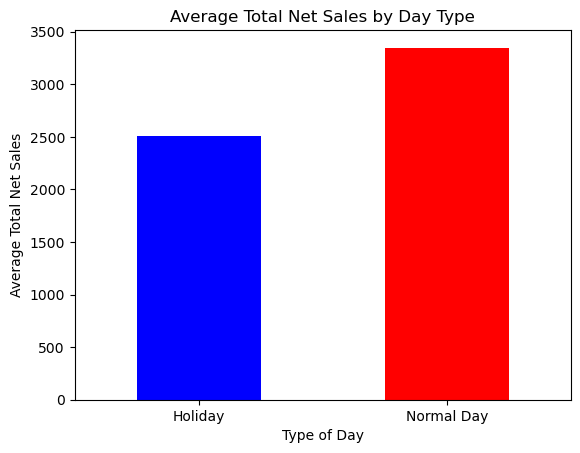

In [8]:
import matplotlib.pyplot as plt

# Plotting the average sales by day type
average_sales_by_type.plot(kind='bar', color=['blue', 'red'])
plt.title('Average Total Net Sales by Day Type')
plt.xlabel('Type of Day')
plt.ylabel('Average Total Net Sales')
plt.xticks(rotation=0)  # Keep labels horizontal for better readability
plt.show()
